<a href="https://colab.research.google.com/github/thomasdcp/Coursera_Capstone/blob/master/RSNA_AI_Certificate_Hands_On_Building_a_Pneumonia_Detection_AI_Model_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RSNA AI Certificate Hands On 

### Building a Pneumonia Detection AI Model

#### by Ian Pan and Felipe Kitamura

**v0.9.3 / 2022-02-01**

Now we're ready to train your Pneumonia AI model using your annotated data


### 1. Load your annotations from the previous Hands On module

![](https://i.imgur.com/9rgSz7v.png)

**Copy / Paste the copied cell content in the cell below.**

It should look like figure above 

If you're not sure where how to find that page of the project that contain your annotations, [click on this link](https://rsna.skp.one/?moduleID=3&urlID=2&userRSNA=2c3ad5da-e4f0-4a9d-96b8-77dbc59327c5).

Make sure you login using the same Google Account that you used previously.


In [ ]:
## Paste cell content below
!pip install --upgrade --quiet mdai

import mdai

DOMAIN = "rsna.md.ai"
PROJECT_ID = "MmRaEXRr"
DATASET_IDS = ["D_dz8X0z", "D_Alnovz"]

# your automatically-generated API access token scoped to this project
ACCESS_TOKEN = "00ba17204012294c58acbce27b2ffe89"

mdai_client = mdai.Client(domain=DOMAIN, access_token=ACCESS_TOKEN)

# Example project initialization - see documentation for details.
# Add dataset_id to scope project to a specific dataset.
# Change path to use a different directory.
p = mdai_client.project(PROJECT_ID, path="./data")


## Paste cell content above

     |████████████████████████████████| 269 kB 20.8 MB/s 
     |████████████████████████████████| 66 kB 2.3 MB/s 
     |████████████████████████████████| 2.0 MB 53.8 MB/s 
     |████████████████████████████████| 43 kB 640 kB/s 
     |████████████████████████████████| 13.0 MB 24.3 MB/s 
Successfully authenticated to rsna.md.ai.
Using path './data' for data.
Preparing annotations export for project MmRaEXRr...                                                
Preparing images export for project MmRaEXRr...                                                     


  0%|          | 96.0k/659M [00:00<45:12, 255kB/s]

  2%|▏         | 16.2M/659M [00:01<00:30, 21.9MB/s]

  6%|▌         | 41.0M/659M [00:02<00:26, 24.9MB/s]

 10%|█         | 66.8M/659M [00:04<00:26, 23.3MB/s]

 16%|█▌        | 106M/659M [00:05<00:23, 25.2MB/s]

 22%|██▏       | 144M/659M [00:07<00:22, 24.4MB/s]
 22%|██▏       | 146M/659M [00:07<00:21, 25.2MB/s]
 23%|██▎       | 152M/659M [00:07<00:22, 23.9MB/s]
 23%|██▎       | 154M/659M [00:07<00:21, 24.6MB/s]
224kB [00:00, 504kB/s]                           
 24%|██▍       | 160M/659M [00:07<00:20, 25.4MB/s]

Success: annotations data for project MmRaEXRr ready.


659MB [00:30, 22.7MB/s]                           


Extracting archive: mdai_rsna_project_LzBg2wq3_images_2022-02-01-164954.zip
Success: images data for project MmRaEXRr ready.


In [ ]:
!pip install --upgrade --quiet mdai

import mdai

def setup_mdai_project(p_DOMAIN, p_PROJECT_ID, p_DATASET_IDS, p_ACCESS_TOKEN):
  DOMAIN = p_DOMAIN
  PROJECT_ID = p_PROJECT_ID
  DATASET_IDS = p_DATASET_IDS

  # your automatically-generated API access token scoped to this project
  ACCESS_TOKEN = p_ACCESS_TOKEN

  mdai_client = mdai.Client(domain=DOMAIN, access_token=ACCESS_TOKEN)

  return mdai_client


try:
  mdai_client = setup_mdai_project(DOMAIN, PROJECT_ID, DATASET_IDS, ACCESS_TOKEN)
except:
  print('Error in setting up user-specified project ...')
  print('Using dummy project instead ...')
  DOMAIN = "rsna.md.ai"
  PROJECT_ID = "4ONL7QR9"
  DATASET_IDS = ["D_A2AY02", "D_9zo64l"]
  ACCESS_TOKEN = "80c36aa27998b422fa4d587787ec4e65"
  mdai_client = mdai.Client(domain=DOMAIN, access_token=ACCESS_TOKEN)

# Example project initialization - see documentation for details.
# Add dataset_id to scope project to a specific dataset.
# Change path to use a different directory.
p = mdai_client.project(PROJECT_ID, path="./data")

Successfully authenticated to rsna.md.ai.
Using path './data' for data.
Preparing annotations export for project MmRaEXRr...                                                
Using cached annotations data for project MmRaEXRr.
Preparing images export for project MmRaEXRr...                                                     
Using cached images data for project MmRaEXRr.


**Now click on the "Runtime" -> "Run all" (CTRL-F9 on most computers)**

It will take a several minutes to execute all the steps. You can follow the execution by scrolling over this page. Do not refresh it.

Feel free to grab a coffee now and watch the pneumonia AI model train

The cell that is currently being executed is shown with a spinning stop button in the upper left corner of that cell, like this one: 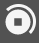

### 2. Installing and loading dependencies

In [ ]:
# Install dependencies not included by Colab
# Use pip3 to ensure compatibility w/ Google Deep Learning Images  
!pip3 install -q pydicom 
!pip3 install -q tqdm
!pip3 install -q imgaug
!pip3 install -q --no-warn-conflicts torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install -q pytorch-lightning==1.2.0
!pip3 install -q omegaconf==2.0.6
!pip3 install -q --upgrade albumentations
!pip3 install -q opencv-python==4.5.4.60
!pip3 install -q timm
!pip3 install -q transformers
!pip3 install -q python-gdcm
!pip3 uninstall -q -y torchtext

     |█████████████                   | 834.1 MB 1.2 MB/s eta 0:16:12tcmalloc: large alloc 1147494400 bytes == 0x390d8000 @  0x7f95d0bca615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:39tcmalloc: large alloc 1434370048 bytes == 0x7d72e000 @  0x7f95d0bca615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████           | 1336.2 MB 14.9 MB/s eta 0:00:48tcmalloc: large alloc 1792966656 bytes == 0x2560000 @  0x7f95d0bca615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x

In [ ]:
import cv2
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pydicom
import re
import sys 
import torch

from omegaconf import OmegaConf
from pydicom.pixel_data_handlers.util import apply_voi_lut
from tqdm import tqdm

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

### 3. Download validation and test data

In [ ]:
# Create projects for the validation/test set
eval_p = mdai_client.project("8VNxZPBw", path="./data")

Using path './data' for data.
Preparing annotations export for project 8VNxZPBw...                                                
Preparing images export for project 8VNxZPBw...                                                     


320kB [00:00, 701kB/s]                           


Success: annotations data for project 8VNxZPBw ready.


1.46GB [01:06, 23.3MB/s]                            


Extracting archive: mdai_rsna_project_8VNxZPBw_images_2021-10-06-113314.zip
Success: images data for project 8VNxZPBw ready.


In [ ]:
# Root directory of the project
ROOT_DIR = os.path.abspath('./data')

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')

if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)
os.chdir('/content')

### 4. Download pneumonia detection library from GitHub

In [ ]:
!rm -rf siim_covid19_detection
!git clone https://github.com/i-pan/siim_covid19_detection
os.chdir('/content/siim_covid19_detection/ian-siim/detect/')
!wget https://github.com/mdai/rsna-education-models/raw/main/rsna18_pretrained_opacity.ckpt

Cloning into 'siim_covid19_detection'...
remote: Enumerating objects: 2390, done.
remote: Counting objects: 100% (2390/2390), done.
remote: Compressing objects: 100% (1631/1631), done.
remote: Total 2390 (delta 720), reused 2380 (delta 714), pack-reused 0
Receiving objects: 100% (2390/2390), 14.83 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (720/720), done.
--2022-12-08 12:03:03--  https://github.com/mdai/rsna-education-models/raw/main/rsna18_pretrained_opacity.ckpt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/mdai/rsna-education-models/main/rsna18_pretrained_opacity.ckpt [following]
--2022-12-08 12:03:03--  https://media.githubusercontent.com/media/mdai/rsna-education-models/main/rsna18_pretrained_opacity.ckpt
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.19

### 5. Prepare datasets

In [ ]:
p.show_label_groups()

Label Group, Id: G_2QZ0JB, Name: Default group
	Labels:
	Id: L_nepb0m, Name: Pneumonia
	Id: L_MbrORM, Name: Normal
	Id: L_mvoRpn, Name: Not Normal Not PNA



In [ ]:
eval_p.show_label_groups()

Label Group, Id: G_nB7ZD2, Name: Default group
	Labels:
	Id: L_n4AE7J, Name: Pneumonia
	Id: L_ngvWOm, Name: Normal
	Id: L_J7XEQM, Name: Not Normal Not PNA



In [ ]:
# This maps label ids to class ids

label_group = p.get_label_groups()[0].get_data()["labels"]

labels_dict = {j["id"]:len(label_group) - i - 1 for i,j in enumerate(label_group)}

p.set_labels_dict(labels_dict)

eval_label_group = eval_p.get_label_groups()[0].get_data()["labels"]

eval_labels_dict = {j["id"]:len(eval_label_group) - i - 1 for i,j in enumerate(eval_label_group)}

eval_p.set_labels_dict(eval_labels_dict)

labels_dict.update(eval_labels_dict)

In [ ]:
p.show_datasets()

Datasets:
Id: D_dz8X0z, Name: Dataset
Id: D_Alnovz, Name: Test



In [ ]:
eval_p.show_datasets()

Datasets:
Id: D_Vzbk82, Name: Val
Id: D_qxGBO2, Name: Test



### 6. Split data into training, validation, and test

In [ ]:
train_dataset = p.get_dataset_by_id(DATASET_IDS[0])
try:
  train_dataset.prepare()
  train_paths = train_dataset.get_image_ids()
  train_anns = train_dataset.imgs_anns_dict
  USER_ID = train_anns[[*train_anns][0]][0]['createdById']
except:
  train_paths, train_anns, USER_ID = [], [], "NA"


val_dataset = eval_p.get_dataset_by_id("D_Vzbk82")
val_dataset.prepare()

val_paths = val_dataset.get_image_ids()
val_anns = val_dataset.imgs_anns_dict

test_dataset = eval_p.get_dataset_by_id("D_qxGBO2")
test_dataset.prepare()

test_paths = test_dataset.get_image_ids()
test_anns = test_dataset.imgs_anns_dict

splits = ['train'] * len(train_paths) + ['val'] * len(val_paths) + ['test'] * len(test_paths)
print(f'TRAIN: N={len(train_paths)}')
print(f'VAL:   N={len(val_paths)}')
print(f'TEST:  N={len(test_paths)}')

splits_dict = dict(
    train={'outer': -1, 'inner0': -1},
    val={'outer': -1, 'inner0': 0},
    test={'outer': 0, 'inner0': -1}
)

TRAIN: N=197
VAL:   N=123
TEST:  N=103


### 7. Prepare annotations

In [ ]:
def transform_bbox(bbox_dict):
  x, y, w, h = bbox_dict['x'], bbox_dict['y'], bbox_dict['width'], bbox_dict['height']
  x1, y1, x2, y2 = x, y, x+w, y+h 
  box = np.expand_dims(np.asarray([x1, y1, x2, y2]), axis=0)
  return box


paths = train_paths + val_paths + test_paths
anns = {}
anns.update(train_anns)
anns.update(val_anns)
anns.update(test_anns)

effdet_annotations = []

for ind, fp in enumerate(paths):
  each_ann = anns[fp]
  if each_ann[0]['data'] is not None:
    tmp_ann = dict(filename=fp.replace('./data/', ''))
    tmp_ann['img_width'], tmp_ann['img_height'] = each_ann[0]['width'], each_ann[0]['height']
    bboxes = np.concatenate([transform_bbox(l['data']) for l in each_ann]).astype('float')
    labels = np.asarray([labels_dict[l['labelId']] - 1 for l in each_ann]).astype('float')
    tmp_ann['bbox'], tmp_ann['cls'] = bboxes, labels
    assert tmp_ann['bbox'].shape[0] == tmp_ann['cls'].shape[0]
    tmp_ann['folds'] = splits_dict[splits[ind]]
    effdet_annotations.append(tmp_ann)


with open('../data/train_bbox_annotations_effdet.pkl', 'wb') as f:
  pickle.dump(effdet_annotations, f)

### 8. Prepare model

In [ ]:
cfg = OmegaConf.load('configs/mks/mk007.yaml')
cfg.data.annotations = '../data/train_bbox_annotations_effdet.pkl'
cfg.data.data_dir = '/content/data/'
cfg.data.dataset.params.dicom = True
cfg.data.outer_fold = 0
cfg.data.inner_fold = 0
cfg.data.exclude_negative_valid = None

cfg.transform.crop = None

cfg.model.params.num_classes = 1
cfg.model.load_pretrained = 'rsna18_pretrained_opacity.ckpt'
cfg.scheduler.params.max_lr = 5e-6
cfg.train.num_epochs = 3
cfg.train.num_snapshots = 1
cfg.train.batch_size = 2

cfg.evaluate.metrics[0].params.num_classes = 1

OmegaConf.save(config=cfg, f='configs/mks/mk007.yaml')

### 9. Run training loop

This will take several minutes, so it may be a good time to take a break

![coffee-break](https://i.giphy.com/media/xUySTrbCFX1h4B8kmc/giphy.gif)

In [ ]:
train_effdet_anns = [_ for _ in effdet_annotations if _['folds']['outer'] + _['folds']['inner0'] == -2]
if len(train_effdet_anns) < 10:
  print(f'There are only {len(train_effdet_anns)} annotations ...')
  print('Skipping training loop and using pretrained checkpoint ...')
  os.makedirs('../experiments/detect/mk007/checkpoints/')
  os.system('cp rsna18_pretrained_opacity.ckpt ../experiments/detect/mk007/checkpoints/last.ckpt')
else:
  !python main.py train configs/mks/mk007.yaml --gpus 1 --precision 16 --num-workers 2

PyTorch environment ...
  torch.__version__              = 1.9.0+cu111
  torch.version.cuda             = 11.1
  torch.backends.cudnn.version() = 8005


Running experiment mk007 ...
Saving checkpoints and logs to ../experiments/detect/ ...
Global seed set to 88
INFO:lightning:Global seed set to 88
<inner fold> : 0
<outer fold> : 0
/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
TRAIN : n=46
VALID

### 10. Evaluate the results

In [ ]:
import sys ; sys.path.insert(0, '/content/siim_covid19_detection/ian-siim/')

from detect.skp import builder
from detect.skp.metrics import mAP
from detect.skp.task_utils import tpfp_default


def read_dicom(path, voi_lut = True, fix_monochrome = True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to 
    # "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    # shape = (H, W)
    data = np.expand_dims(data, axis=-1)
    data = np.repeat(data, 3, axis=-1)
    # shape = (H, W, 3)
    return data


def get_tpfp(dets, gt_bboxes, gt_labels):
    nc = 1
    tpfp_list, num_gts = [], []
    for each_cls in range(1, nc+1): 
        classes = dets[...,-1]
        cls_dets = dets[classes == each_cls]
        cls_gt = gt_labels[gt_labels == each_cls]
        cls_bboxes = gt_bboxes[gt_labels == each_cls]
        tp, fp = tpfp_default(cls_dets[...,:-1], cls_bboxes, iou_thr=0.5)
        scores = cls_dets[...,-2]
        results = torch.cat([tp, fp, scores.unsqueeze(0)])
        results = results.transpose(1,0)
        tpfp_list.append(results)
        num_gts.append(len(cls_gt))
    return tpfp_list, num_gts
  

def load_model(cfg, checkpoint):
    cfg.model.params.pretrained = False
    cfg.model.params.inference = True
    if 'load_pretrained' in cfg.model.params: cfg.model.params.load_pretrained = None
    model = builder.build_model(cfg)
    print (f'Loading model from {checkpoint} ... ')
    weights = torch.load(checkpoint, map_location=lambda storage, loc: storage)['state_dict']
    weights = {re.sub(r'^model.', '', k) : v for k,v in weights.items()}
    model.load_state_dict(weights)
    return model.eval().cuda()


def load_config(cfgname):
    config = OmegaConf.load(f'configs/mks/{cfgname}.yaml')
    config.data.dataset.name = 'CXRDataset'
    config.data.dataset.params.dicom = True
    return config


def draw_bbox(img, rects):
    for r in rects:
        xmin, ymin, xmax, ymax = r
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
    return img


cfg = load_config('mk007')
model = load_model(cfg, '../experiments/detect/mk007/checkpoints/last.ckpt')
dataset = builder.build_dataset(cfg, data_info=dict(annotations=[]), mode='predict')

# Store detection predictions
model_predictions = {}
visualizations = []
metric = mAP(num_classes=1)

for dcmfile in tqdm(test_paths):
    each_ann = anns[dcmfile]
    dcmfile = dcmfile.replace('./data/', '/content/data/')
    try:
      dcm = read_dicom(dcmfile)
    except RuntimeError:
      continue
    original_size = dcm.shape
    gt_bboxes = np.concatenate([transform_bbox(l['data']) for l in each_ann]).astype('float')
    gt_labels = np.asarray([labels_dict[l['labelId']] - 1 for l in each_ann]).astype('float')
    gt_bboxes = torch.from_numpy(gt_bboxes)
    gt_labels = torch.from_numpy(gt_labels)

    X = dataset.resize(image=dcm.copy(), bboxes=[], labels=[])['image']
    new_size = X.shape
    scale_factor = (original_size[0] / new_size[0], original_size[1] / new_size[1])
    X = dataset.preprocess(X)
    X = X.transpose(2,0,1)
    X = torch.from_numpy(X).float().unsqueeze(0).cuda()
    with torch.no_grad():
        dets = model(X)
    dets = dets[0, :, [1,0,3,2,4,5]]
    dets[:, [0,2]] *= scale_factor[1]
    dets[:, [1,3]] *= scale_factor[0]

    results = [get_tpfp(dets, gt_bboxes, gt_labels)]
    # Reformat results so that it is a list of length=num_classes
    # Then turn each element of this list into a torch.Tensor
    results_reformat, num_gts = [], []
    for each_cls in range(1):
        class_list = [r[0][each_cls] for r in results]
        cls_num_gts = sum([r[1][each_cls] for r in results])
        results_reformat.append(torch.cat(class_list))
        num_gts.append(cls_num_gts)
    
    metric.update(results_reformat, num_gts)
    dets = dets.cpu().numpy()
    img_w_bbox = draw_bbox(dcm.copy(), list(dets[dets[:,4] >= 0.3, :4].astype('int')))
    model_predictions[dcmfile] = dets
    visualizations.append(img_w_bbox)

final_map = metric.compute()['map']
os.system(f'curl -JLO "https://rsna.skp.one/?moduleID=3&urlID=3&userMDAI={USER_ID}&projectID={PROJECT_ID}&metric={final_map:0.4f}"')
print(f'\n\nMEAN AVERAGE PRECISION: {final_map:0.4f}')

Creating model <EffDet> ...
  Using backbone <tf_efficientnet_b6> ...
  Pretrained : False
Loading model from ../experiments/detect/mk007/checkpoints/last.ckpt ... 


100%|██████████| 103/103 [00:33<00:00,  3.09it/s]




MEAN AVERAGE PRECISION: 0.5691


## How well did your AI model perform?

For initial evaluation of your AI model, we're using a metric called mean average precision (final number in above cell).

### mAP

Mean average precision (mAP) is a popular metric for evaluating the performance of object detection models which predict bounding boxes. First, an overlap threshold is specified to determine whether a predicted bounding box is a true positive. The mAP takes into account the model's sensitivity and positive predictive value at the bounding box level. The theoretical range of mAP is 0 to 1. For this task, mAP of 0.6 is considered very good.

Here's a good reference for additional information about mAP: https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52#1a59

### Leaderboard

In case you're curious how your model performs compared with others taking the course, we'll be preparing a 'leaderboard' later in the course for fun.  The variation in the mAP values in the leaderboard will largely be based on differences in the annotations you performed earlier.

Stay tuned..

### Let's look at a few examples of how well your AI model predicts pneumonia below for a few random images

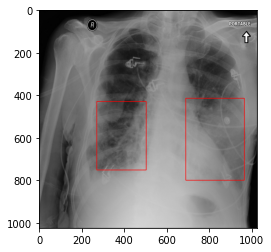

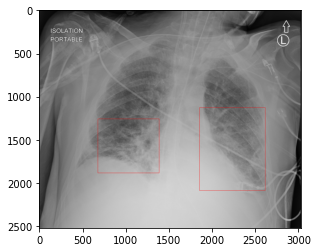

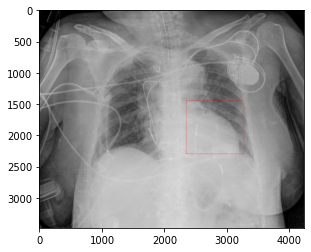

In [ ]:
# Finally, let's look at some of the AI outputs that your model predicts on the test data
#
# Each time you press the play button on the left, a few random images with predicted
# bounding boxes will be shown. 
plt.imshow(np.random.choice(visualizations)); plt.show()
plt.imshow(np.random.choice(visualizations)); plt.show()
plt.imshow(np.random.choice(visualizations)); plt.show()

#### Import model outputs into your MD.ai project

Even though we're using the mean average precision metric for an overall evaluation of how your model performs, radiologists (and other medical professionals) often prefer to visually see how these AI outputs appear in the context of these x-rays.

So you'll be using these model prediction outputs in later in the course to visually evaluate how well your model performed on the test dataset.

In [ ]:
upload_annotations = []
pneumonia_label_id = [i for i in p.classes_dict if p.classes_dict[i]["class_text"] == "Pneumonia"][0]

# Format predictions as required for displaying on MD.ai (https://docs.md.ai/libraries/python/guides-import/)
for id, val in model_predictions.items():
  sop = os.path.splitext(id.split("/")[-1])[0]
  data = list(val[val[:,4] >= 0.3, :4].astype('int'))
  for bbox in data:
    bbox = bbox.tolist()
    bbox = {"x":bbox[0], "y":bbox[1], "width": bbox[2] - bbox[0], "height": bbox[3] - bbox[1]}
    upload_annotations.append({"labelId": pneumonia_label_id,
                               "SOPInstanceUID": sop,
                               "data": bbox})

# Import model outputs
mdai_client.import_annotations(upload_annotations, PROJECT_ID, DATASET_IDS[1])

Importing 179 annotations into project MmRaEXRr, dataset D_Alnovz...                                
Successfully imported 179 / 179 annotations into project MmRaEXRr, dataset D_Alnovz.


[]

# Congrats! You've finished building your pneumonia AI model.
